In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diploids_df = pd.read_csv("df_norm_3_time_all_median.csv")

In [3]:
all_df = pd.read_csv("/volumes/roussou/Microscopy/CellAsic/Atp6_NG_x_Atp6_mKate_WT/all_exp/all_exp/multiExp_AllPos_acdc_output_3d_all_wt_diploids_correct.csv") 

In [4]:
def process_dataframe(df):
    # Selecting specific columns
    df = df[["experiment_foldername", "Position_n", "Cell_ID", 'frame_i',
             '_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj', 
             '_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj', 
             '_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj',
             '_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj', ]]

    # Combining experiment_foldername and Position_n into a new column exp_pos
    df["exp_pos"] = df[["experiment_foldername", "Position_n"]].apply(lambda x: "_".join(x), axis=1)

    # Creating exp_pos_cell by combining experiment_foldername, Position_n, and Cell_ID
    df["exp_pos_cell"] = df["experiment_foldername"] + "_" + df["Position_n"].astype(str) + "_" + df["Cell_ID"].astype(str)
    
    df['h'] = df['_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj']/(df['_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj'] + df['_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj'])

    return df

In [5]:
all_df = process_dataframe(all_df)
#all_df

<ipython-input-4-081b9af64da1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_pos"] = df[["experiment_foldername", "Position_n"]].apply(lambda x: "_".join(x), axis=1)
<ipython-input-4-081b9af64da1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_pos_cell"] = df["experiment_foldername"] + "_" + df["Position_n"].astype(str) + "_" + df["Cell_ID"].astype(str)
<ipython-input-4-081b9af64da1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [6]:
last_fr_df = all_df[all_df.frame_i == 32]
#last_fr_df

In [7]:
homo_ng = last_fr_df.loc[last_fr_df['exp_pos_cell'].isin(
    ['exp1_Position_1_506', 'exp1_Position_1_507'
    'exp5_Position_2_2807','exp5_Position_2_2808', 
    'exp5_Position_1_1302', 'exp5_Position_1_1303',
    'exp4_Position_4_2201', 'exp4_Position_4_2202'])]
homo_ng

homo_mk = last_fr_df.loc[last_fr_df['exp_pos_cell'].isin(
    ['exp5_Position_1_1300', 'exp5_Position_1_1301',
    'exp5_Position_2_2802','exp5_Position_2_2806',
    'exp4_Position_4_2198', 'exp4_Position_4_2200', 
    'exp4_0Position_5_1045','exp4_Position_5_1046'])]
homo_mk

,experiment_foldername,Position_n,Cell_ID,frame_i,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,h
454,exp5,Position_1,1300,32,61.876423,46.663282,1234.903566,799.155752,exp5_Position_1,exp5_Position_1_1300,0.952285
455,exp5,Position_1,1301,32,52.466535,32.936002,1534.866275,975.456006,exp5_Position_1,exp5_Position_1_1301,0.966947
1149,exp5,Position_2,2802,32,19.278758,36.700715,805.240516,790.722218,exp5_Position_2,exp5_Position_2_2802,0.976618
1152,exp5,Position_2,2806,32,13.200484,34.296336,661.647042,644.067165,exp5_Position_2,exp5_Position_2_2806,0.980439
7529,exp4,Position_4,2198,32,39.220525,104.665252,1892.086398,1946.391597,exp4_Position_4,exp4_Position_4_2198,0.979692
7530,exp4,Position_4,2200,32,47.379794,98.104673,1536.591048,1578.681905,exp4_Position_4,exp4_Position_4_2200,0.970088
8770,exp4,Position_5,1046,32,9.238098,53.801872,1019.056915,1157.841238,exp4_Position_5,exp4_Position_5_1046,0.991016


In [8]:
# Diploids Homo mKate cells
dip_homo_mk = last_fr_df.loc[last_fr_df['exp_pos_cell'].isin(
    ['exp3_Position_4_18', 'exp3_Position_2_43', 'exp3_Position_3_12', 
    'exp1_Position_2_35', 'exp4_Position_1_186', 'exp4_Position_5_92',
    'exp5_Position_2_1497', 'exp5_Position_3_65', #'exp5_070223_Position_1_262'
    ])]
dip_homo_mk

# Diploids Homo NG cells
dip_homo_ng = last_fr_df.loc[last_fr_df['exp_pos_cell'].isin(
    ['exp3_Position_4_128', 'exp3_Position_2_40', 'exp3_Position_3_95',
    'exp1_Position_2_210', 'exp1_Position_1_93', 'exp1_Position_6_271', 
    'exp5_Position_2_340', 'exp5_Position_3_37',
    'exp4_Position_5_187', 'exp4_Position_1_159'])]
dip_homo_ng

# Diploids Hetero cells
dip_hetero = last_fr_df.loc[last_fr_df['exp_pos_cell'].isin(
    ['exp3_Position_4_13', 'exp3_Position_2_50', 'exp3_Position_3_14',
     'exp1_Position_2_32', 'exp1_Position_1_250', 'exp1_Position_6_50', 'exp1_Position_2_563',
     'exp5_Position_2_1019', 'exp5_Position_3_103', 'exp4_Position_5_21', 'exp4_Position_1_62'])]
dip_hetero

,experiment_foldername,Position_n,Cell_ID,frame_i,_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj,_NG_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj,_mKate_3D_concentration_dataPrepBkgr_from_vol_fl_meanProj,exp_pos,exp_pos_cell,h
1098,exp5,Position_2,1019,32,851.701579,874.374333,699.198503,680.304541,exp5_Position_2,exp5_Position_2_1019,0.450834
2179,exp5,Position_3,103,32,1116.825834,1124.454878,977.580826,997.924942,exp5_Position_3,exp5_Position_3_103,0.466758
2924,exp4,Position_1,62,32,1436.509760,-383.843466,1078.559014,506.250992,exp4_Position_1,exp4_Position_1_62,0.428839
8639,exp4,Position_5,21,32,700.185328,737.661475,1131.196918,1247.908347,exp4_Position_5,exp4_Position_5_21,0.617674
11938,exp1,Position_2,32,32,273.185623,-24.593974,219.749463,10.498936,exp1_Position_2,exp1_Position_2_32,0.445798
12139,exp1,Position_2,563,32,423.195109,-223.529719,456.607416,2.152131,exp1_Position_2,exp1_Position_2_563,0.518989


In [9]:
def assign_entries(df, cell_type, homo_type):
    # Assign cell type and homo type
    df['cell_type'] = cell_type
    df['homo_type'] = homo_type
  
    return df

In [10]:
dip_hetero = assign_entries(dip_hetero, 'diploid', 'hetero')
dip_homo_ng = assign_entries(dip_homo_ng, 'diploid', 'homo_ng')
dip_homo_mk = assign_entries(dip_homo_mk, 'diploid', 'homo_mk')

homo_ng = assign_entries(homo_ng, 'haploid', 'homo_ng')
homo_mk = assign_entries(homo_mk, 'haploid', 'homo_mk')

<ipython-input-9-e958b25451f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cell_type'] = cell_type
<ipython-input-9-e958b25451f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['homo_type'] = homo_type
<ipython-input-9-e958b25451f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [11]:
columns = ['exp_pos', 'exp_pos_cell','_mKate_3D_concentration_autoBkgr_from_vol_fl_meanProj',  '_NG_3D_concentration_autoBkgr_from_vol_fl_meanProj', 'h', 'homo_type', 'cell_type']
dfs = [dip_hetero, dip_homo_mk, dip_homo_ng, homo_mk, homo_ng]

selected_dfs = [df[columns] for df in dfs]

combined_df = pd.concat(selected_dfs, ignore_index=True)

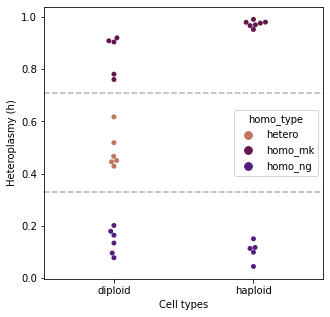

In [34]:
plt.figure(figsize=(5, 5))

u = sns.color_palette('twilight_r', 4)
sns.swarmplot(data=combined_df, x="cell_type", y="h", hue="homo_type", palette = u)
ax = plt.gca()
ax.axhline(y=0.71, color='k', linestyle='--', alpha=0.3)
ax.axhline(y=0.33, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Cell types')
plt.ylabel('Heteroplasmy (h)')
plt.savefig('haploids_notmated_diploids_h.svg', transparent = True)

In [70]:
combined_df.to_csv('combined_hetero_homo_hapl_dipl_meanProj_df.csv', index=False)